## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy.io import savemat, loadmat
from sklearn import preprocessing
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

# 2 OUTPUT 

In [2]:
# load file
folder = '../mat_files/5/'
filename = 'dataset6Output.mat'
dataset = loadmat(folder+filename)
print(dataset['label'])
dataset = dataset['dataset']

['dataset untuk proses klasifikasi 6 output']


In [3]:
dataset.shape

(360, 12, 10)

In [4]:
# load file
folder = '../mat_files/5/'
filename = 'target-2Out.mat'
target = loadmat(folder+filename)

print(target['label'])
target = target['target'][0]
#print(target)

['target 2 kelas untuk proses klasifikasi']


In [5]:
int_array = target.astype(int)
target = int_array

In [6]:
nsamples, nx, ny = dataset.shape
print(nsamples, nx, ny)
D2_dataset = dataset.reshape((nsamples,nx*ny))
D2_dataset.shape

360 12 10


(360, 120)

In [7]:
print(f'Dimensi Feature: {D2_dataset.shape}')
print(f'Class: {set(target)}')

Dimensi Feature: (360, 120)
Class: {0, 1}


In [8]:
scaler = preprocessing.normalize(D2_dataset)

In [9]:
# RS = np.arange(1,100,1)

# train_results = []
# test_results = []

# for i in range(len(RS)): 
#     x_train, x_test, y_train, y_test = train_test_split(scaler,
#                                                         target,
#                                                         test_size=0.2,
#                                                         random_state= i)
#     model = RandomForestClassifier(random_state = 0)
#     model.fit(x_train,y_train)
#       #Prediksi nilai y dari data train
#     y_predt = model.predict(x_train)
#       #Prediksi nilai y dari data test
#     y_pred = model.predict(x_test)
    
#     train_acc = model.score(x_train,y_train)
#     train_results.append(train_acc)
    
#     test_acc = model.score(x_test,y_test)
#     test_results.append(test_acc)
#     print(i)
#     print(f'Final Training Accuracy: {model.score(x_train,y_train)*100}%')
#     print(f'Model Accuracy: {model.score(x_test,y_test)*100}%')
    
# print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
# len(RS)

In [10]:
#Menggunakan library sklearn
#Memisah dataset menjadi data training dan data test
x_train, x_test, y_train, y_test = train_test_split(scaler,target,test_size=0.2,random_state=3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(288, 120) (72, 120) (288,) (72,)


In [11]:
model = RandomForestClassifier(max_features = 'sqrt',
                               max_depth = 5,  
                               n_estimators = 100, 
                               min_samples_leaf = 2, 
                               min_samples_split = 2,
                               random_state = 3)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                       random_state=3)

In [12]:
#Prediksi nilai y dari data train
y_predt = model.predict(x_train)
#Prediksi nilai y dari data test
y_pred = model.predict(x_test)

In [13]:
# print(classification_report(y_train, y_predt))
# print(classification_report(y_test, y_pred))

In [14]:
print(f'Final Training Accuracy: {model.score(x_train,y_train)*100}%')
print(f'Model Accuracy: {model.score(x_test,y_test)*100}%')

Final Training Accuracy: 98.26388888888889%
Model Accuracy: 95.83333333333334%


In [30]:
Nilai_Akurasi = accuracy_score(y_test, y_pred)*100
Nilai_Sensitifitas = recall_score(y_test, y_pred, average='macro')*100
Nilai_Presisi = precision_score(y_test, y_pred, average='macro')*100

print(Nilai_Akurasi)
print(Nilai_Sensitifitas)
print(Nilai_Presisi)

95.83333333333334
95.94594594594594
96.05263157894737


In [16]:
# print(confusion_matrix(y_train, y_predt))
# print(confusion_matrix(y_test, y_pred))

In [17]:
cf_matrix = confusion_matrix(y_test, y_pred)

Text(33.0, 0.5, '\nNilai Aktual')

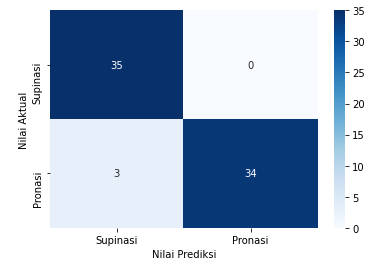

In [18]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True,cmap='Blues',
                 xticklabels=['Supinasi','Pronasi'],
                 yticklabels=['Supinasi','Pronasi'])
ax.set_xlabel('Nilai Prediksi')
ax.set_ylabel('\nNilai Aktual')


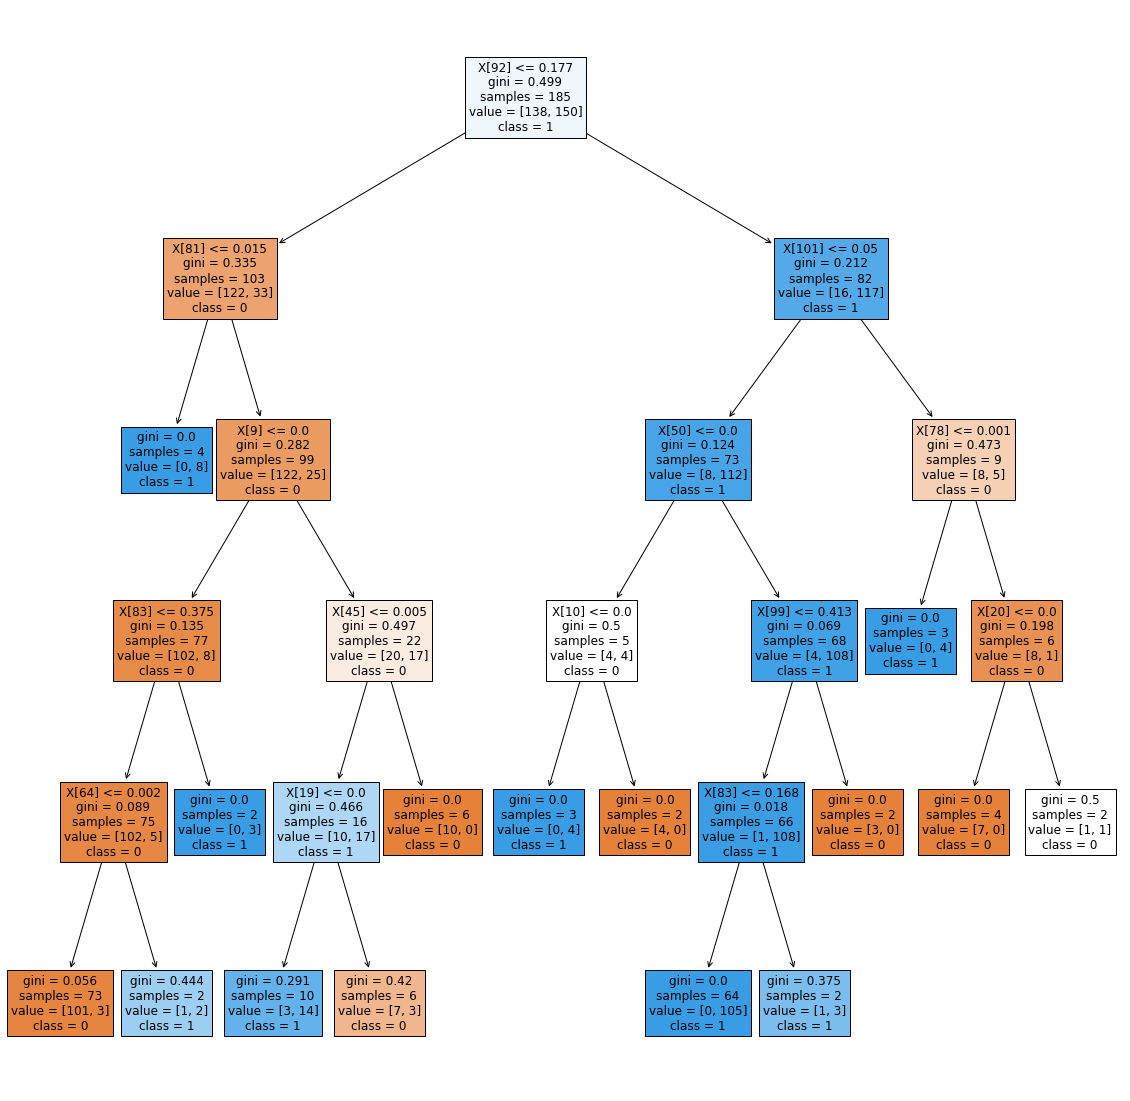

In [19]:
from sklearn import tree
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plt.figure(figsize=(20,20))
tree.plot_tree(model.estimators_[2],class_names = ('0','1'),filled=True, fontsize = 12);
#fig.savefig('rf2_individualtree.png')

## TUNNING

1
Final Training Accuracy: 100.0%
Model Accuracy: 95.83333333333334%
 
2
Final Training Accuracy: 100.0%
Model Accuracy: 95.83333333333334%
 
3
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
4
Final Training Accuracy: 100.0%
Model Accuracy: 95.83333333333334%
 
5
Final Training Accuracy: 100.0%
Model Accuracy: 95.83333333333334%
 
6
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
7
Final Training Accuracy: 100.0%
Model Accuracy: 94.44444444444444%
 
8
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
9
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
10
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
11
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
12
Final Training Accuracy: 100.0%
Model Accuracy: 95.83333333333334%
 
13
Final Training Accuracy: 100.0%
Model Accuracy: 95.83333333333334%
 
14
Final Training Accuracy: 100.0%
Model Accuracy: 95.83333333333334%
 
1

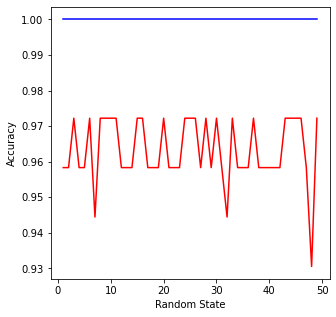

In [20]:
random_state = np.arange(1,50,1)
train_results = []
test_results = []

for random in random_state:
    rf = RandomForestClassifier(random_state = random)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    
    train_acc = rf.score(x_train,y_train)
    train_results.append(train_acc)
    
    test_acc = rf.score(x_test,y_test)
    test_results.append(test_acc)
    
    print(random)
    print(f'Final Training Accuracy: {rf.score(x_train,y_train)*100}%')
    print(f'Model Accuracy: {rf.score(x_test,y_test)*100}%')
    print(" ")
    
    
plt.figure(figsize=(5,5))
line1, = plt.plot(random_state, train_results, "b", label="Train AUC")
line2, = plt.plot(random_state, test_results, "r", label="Test AUC")

plt.ylabel("Accuracy")
plt.xlabel("Random State")
plt.show()

1
Final Training Accuracy: 96.18055555555556%
Model Accuracy: 91.66666666666666%
 
15
Final Training Accuracy: 99.65277777777779%
Model Accuracy: 95.83333333333334%
 
29
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
43
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
57
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
71
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
85
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
99
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 


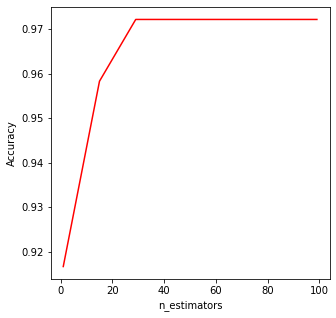

In [21]:
n_estimators = np.arange(1,100,14)
train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state = 0)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    
    train_acc = rf.score(x_train,y_train)
    train_results.append(train_acc)
    
    test_acc = rf.score(x_test,y_test)
    test_results.append(test_acc)
    
    print(estimator)
    print(f'Final Training Accuracy: {rf.score(x_train,y_train)*100}%')
    print(f'Model Accuracy: {rf.score(x_test,y_test)*100}%')
    print(" ")
    
    
plt.figure(figsize=(5,5))
#line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")

plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.show()

sqrt
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
log2
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 


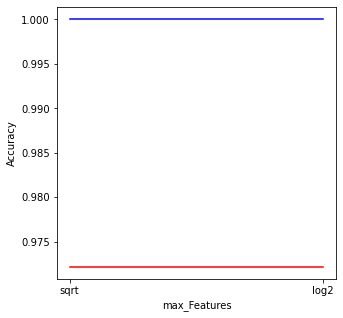

In [22]:
max_features = ['sqrt', 'log2']
train_results = []
test_results = []

for maxFeatures in max_features:
    rf = RandomForestClassifier(max_features = maxFeatures, random_state = 0)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    
    train_acc = rf.score(x_train,y_train)
    train_results.append(train_acc)
    
    test_acc = rf.score(x_test,y_test)
    test_results.append(test_acc)
    
    print(maxFeatures)
    print(f'Final Training Accuracy: {rf.score(x_train,y_train)*100}%')
    print(f'Model Accuracy: {rf.score(x_test,y_test)*100}%')
    print(" ")
    
    
plt.figure(figsize=(5,5))
line1, = plt.plot(max_features, train_results, "b", label="Train AUC")
line2, = plt.plot(max_features, test_results, "r", label="Test AUC")

plt.ylabel("Accuracy")
plt.xlabel("max_Features")
plt.show()

1
Final Training Accuracy: 87.15277777777779%
Model Accuracy: 90.27777777777779%
 
2
Final Training Accuracy: 90.27777777777779%
Model Accuracy: 94.44444444444444%
 
3
Final Training Accuracy: 95.13888888888889%
Model Accuracy: 93.05555555555556%
 
4
Final Training Accuracy: 97.22222222222221%
Model Accuracy: 97.22222222222221%
 
5
Final Training Accuracy: 98.26388888888889%
Model Accuracy: 97.22222222222221%
 
6
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
7
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
8
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
9
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
10
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
11
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
12
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
13
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
14
Final Trai

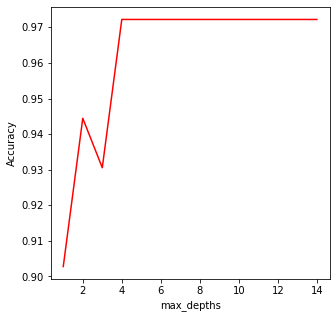

In [23]:
max_depth = np.arange(1,15,1)
train_results = []
test_results = []

for maxDepths in max_depth:
    rf = RandomForestClassifier(max_depth = maxDepths , random_state = 0)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    
    train_acc = rf.score(x_train,y_train)
    train_results.append(train_acc)
    
    test_acc = rf.score(x_test,y_test)
    test_results.append(test_acc)
    
    print(maxDepths)
    print(f'Final Training Accuracy: {rf.score(x_train,y_train)*100}%')
    print(f'Model Accuracy: {rf.score(x_test,y_test)*100}%')
    print(" ")
    
    
plt.figure(figsize=(5,5))
#line1, = plt.plot(max_depth, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depth, test_results, "r", label="Test AUC")

plt.ylabel("Accuracy")
plt.xlabel("max_depths")
plt.show()

1
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
2
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
3
Final Training Accuracy: 99.30555555555556%
Model Accuracy: 97.22222222222221%
 
4
Final Training Accuracy: 98.61111111111111%
Model Accuracy: 97.22222222222221%
 
5
Final Training Accuracy: 97.22222222222221%
Model Accuracy: 97.22222222222221%
 
6
Final Training Accuracy: 97.22222222222221%
Model Accuracy: 97.22222222222221%
 
7
Final Training Accuracy: 96.18055555555556%
Model Accuracy: 94.44444444444444%
 
8
Final Training Accuracy: 95.13888888888889%
Model Accuracy: 95.83333333333334%
 
9
Final Training Accuracy: 94.79166666666666%
Model Accuracy: 94.44444444444444%
 


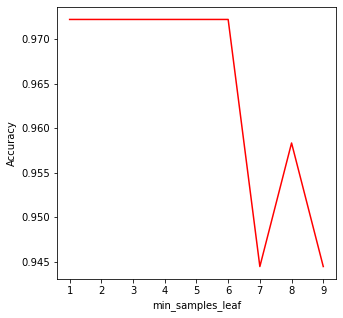

In [24]:
min_samples_leaf = np.arange(1,10,1)
train_results = []
test_results = []

for minSampleLeaf in min_samples_leaf:
    rf = RandomForestClassifier(min_samples_leaf = minSampleLeaf , random_state = 0)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    
    train_acc = rf.score(x_train,y_train)
    train_results.append(train_acc)
    
    test_acc = rf.score(x_test,y_test)
    test_results.append(test_acc)
    
    print(minSampleLeaf)
    print(f'Final Training Accuracy: {rf.score(x_train,y_train)*100}%')
    print(f'Model Accuracy: {rf.score(x_test,y_test)*100}%')
    print(" ")
    
    
plt.figure(figsize=(5,5))
#line1, = plt.plot(min_samples_leaf, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_leaf, test_results, "r", label="Test AUC")

plt.ylabel("Accuracy")
plt.xlabel("min_samples_leaf")
plt.show()

2
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
3
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
4
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
5
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
6
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
7
Final Training Accuracy: 100.0%
Model Accuracy: 97.22222222222221%
 
8
Final Training Accuracy: 99.65277777777779%
Model Accuracy: 97.22222222222221%
 
9
Final Training Accuracy: 99.65277777777779%
Model Accuracy: 97.22222222222221%
 


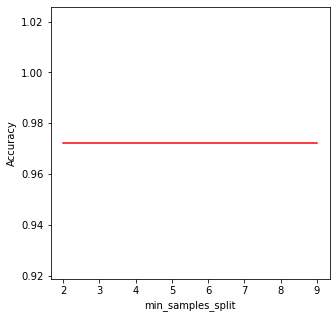

In [25]:
min_samples_split = np.arange(2,10,1)
train_results = []
test_results = []

for minSampleSplit in min_samples_split:
    rf = RandomForestClassifier(min_samples_split = minSampleSplit , random_state = 0)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    
    train_acc = rf.score(x_train,y_train)
    train_results.append(train_acc)
    
    test_acc = rf.score(x_test,y_test)
    test_results.append(test_acc)
    
    print(minSampleSplit)
    print(f'Final Training Accuracy: {rf.score(x_train,y_train)*100}%')
    print(f'Model Accuracy: {rf.score(x_test,y_test)*100}%')
    print(" ")
    
    
plt.figure(figsize=(5,5))
#line1, = plt.plot(min_samples_split, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_split, test_results, "r", label="Test AUC")

plt.ylabel("Accuracy")
plt.xlabel("min_samples_split")
plt.show()